Title - Feeding data to pretrained neural network and making predictions.

Introduction:
Pretrained neural networks have emerged as powerful tools in the field of machine learning, revolutionizing various applications such as image recognition, natural language processing, and more. These networks are trained on large-scale datasets, typically using massive computational resources, to learn complex patterns and features from the data. In this lab, we will explore how to feed data to a pretrained neural network and make predictions based on the learned representations.

Understanding Pretrained Neural Networks:
A pretrained neural network is a model that has already been trained on a large dataset for a specific task, such as image classification using ImageNet or language modeling using vast text corpora. These networks, often deep convolutional or transformer-based architectures, have learned to recognize and extract meaningful features from the data during their training phase.

Transfer Learning:
One of the key advantages of pretrained models is their ability to leverage knowledge gained from one task and apply it to another related task. This process, known as transfer learning, involves reusing the learned representations from a pretrained network as a starting point for a new task. Fine-tuning the network on the new data allows it to adapt and generalize better to the specific task at hand.

Preprocessing the Data:
Before feeding data to a pretrained neural network, it's crucial to preprocess the input data appropriately. For example, in image recognition tasks, images may need to be resized, normalized, and centered. For natural language processing tasks, text may be tokenized and converted into numerical representations like word embeddings.

Loading the Pretrained Model:
To use a pretrained model, first, we need to load the architecture and weights. Many deep learning frameworks offer pre-trained models that can be easily downloaded and integrated into your project. Once loaded, the model can be treated as a feature extractor or fine-tuned for your specific task.

Feature Extraction:
In some cases, you might use the pretrained network as a feature extractor. By removing the last few layers responsible for task-specific predictions, you can obtain a fixed-length representation of the input data that encodes the learned features. These features can then be used as input to another machine learning model.

Making Predictions:
For tasks such as image classification or object detection, you can pass the preprocessed data through the pretrained model and obtain predictions directly. In this case, the model's output layer will provide the predicted class probabilities.

Fine-Tuning for Specific Tasks:
For more complex tasks or when the target domain significantly differs from the original dataset, fine-tuning the pretrained model becomes necessary. This process involves training the model on the new data while keeping the initial weights frozen for some layers to retain the previously learned knowledge.

Hyperparameter Tuning:
When fine-tuning, it's essential to perform hyperparameter tuning to achieve the best results. The learning rate, batch size, and number of training epochs are some crucial hyperparameters that can significantly impact model performance.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [ ]:
# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 4s 0us/step


In [ ]:
#Source - https://m.media-amazon.com/images/I/41TA+JsqgbL._SX331_BO1,204,203,200_.jpg

# Load the image and preprocess it
img_path = '/content/cat.jpg'
img = load_img(img_path, target_size=(224, 224))
img = img_to_array(img)
img = preprocess_input(img)

In [ ]:
# Reshape the image to be a batch of size 1
img = img.reshape((1,) + img.shape)

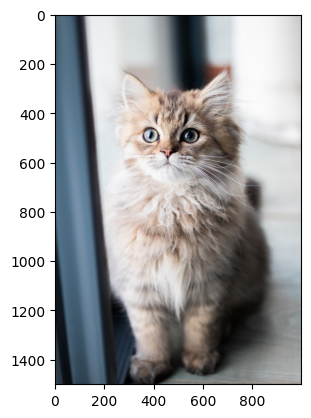

In [ ]:
import matplotlib.pyplot as plt

# Show the image
plt.imshow(load_img(img_path))
plt.show()

In [ ]:
# Make predictions on the image
preds = model.predict(img)

1/1 [==============================] - 2s 2s/step


In [ ]:
# Decode the predictions
decoded_preds = decode_predictions(preds, top=3)[0]

35363/35363 [==============================] - 0s 0us/step


In [ ]:
# Print the top 3 predictions
for prediction in decoded_preds:
    print(prediction[1], prediction[2])

Persian_cat 0.86099064
lynx 0.06629035
tabby 0.024227027


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import cv2

# Load the pretrained VGG16 model
model = VGG16(weights='imagenet', include_top=True)

# Compile the model to run eagerly
model.compile(run_eagerly=True)

#source - https://pixabay.com/videos/animals-dogs-husky-door-40673/

# Load the video file using OpenCV
cap = cv2.VideoCapture('/content/dog-45934.mp4')

# Define the number of frames to be extracted per second
frame_rate = 1
count = 0

# Define a list to store the extracted frames
frames = []

while cap.isOpened():
    # Extract the frames
    frame_id = cap.get(1)
    ret, frame = cap.read()

    if not ret:
        break

    # Extract the frames with the given frame rate
    if frame_id % frame_rate == 0:
        # Resize the frame to fit the VGG16 input size
        frame = cv2.resize(frame, (224, 224))
        # Convert the frame to an image array
        img = image.img_to_array(frame)
        # Preprocess the image array
        img = preprocess_input(img)
        # Append the image array to the frames list
        frames.append(img)

    count += 1

# Release the video capture object
cap.release()

# Convert the list of frames to a numpy array
X = np.array(frames)

# Make predictions on the video frames
predictions = model.predict(X)

# Print the predicted class labels for each frame
for i in range(len(predictions)):
    # Get the index of the class with the highest score
    class_index = np.argmax(predictions[i])
    # Get the name of the class from the ImageNet dataset
    class_name = tf.keras.applications.imagenet_utils.decode_predictions(
        predictions[i].reshape(1, -1), top=1)[0][0][1]
    print(f"Frame {i}: {class_name}")

35363/35363 [==============================] - 0s 0us/step
Frame 0: German_short-haired_pointer
Frame 1: German_short-haired_pointer
Frame 2: German_short-haired_pointer
Frame 3: German_short-haired_pointer
Frame 4: German_short-haired_pointer
Frame 5: German_short-haired_pointer
Frame 6: German_short-haired_pointer
Frame 7: German_short-haired_pointer
Frame 8: German_short-haired_pointer
Frame 9: German_short-haired_pointer
Frame 10: German_short-haired_pointer
Frame 11: German_short-haired_pointer
Frame 12: German_short-haired_pointer
Frame 13: German_short-haired_pointer
Frame 14: German_short-haired_pointer
Frame 15: German_short-haired_pointer
Frame 16: German_short-haired_pointer
Frame 17: German_short-haired_pointer
Frame 18: German_short-haired_pointer
Frame 19: German_short-haired_pointer
Frame 20: German_short-haired_pointer
Frame 21: German_short-haired_pointer
Frame 22: bluetick
Frame 23: German_short-haired_pointer
Frame 24: German_short-haired_pointer
Frame 25: German_sho